### The purpose of the challenge.  

 - Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

 - First, load the dataset.

 - Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

 - Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

 - In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

 - Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

### 1. First, load the dataset.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as stats

from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

life_df = pd.read_sql_query('select * from lifeexpectancy', con=engine)
engine.dispose()

In [2]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

### 2. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [5]:
life_df['Country'].count()

2938

Okay, the maximum rows of a column is 2938, we could know this above checking with 'Country' column.  
Then, let's check columns each that how many rows are missing.

In [6]:
for i in life_df.columns:
    print('This is the amount of missing data in {} column.'.format(i))
    missing_data = life_df['Country'].count() - life_df[i].count()
    print('The missing data of the {} column : {}'.format(i, missing_data), '\n')

This is the amount of missing data in Country column.
The missing data of the Country column : 0 

This is the amount of missing data in Year column.
The missing data of the Year column : 0 

This is the amount of missing data in Status column.
The missing data of the Status column : 0 

This is the amount of missing data in Life expectancy  column.
The missing data of the Life expectancy  column : 10 

This is the amount of missing data in Adult Mortality column.
The missing data of the Adult Mortality column : 10 

This is the amount of missing data in infant deaths column.
The missing data of the infant deaths column : 0 

This is the amount of missing data in Alcohol column.
The missing data of the Alcohol column : 194 

This is the amount of missing data in percentage expenditure column.
The missing data of the percentage expenditure column : 0 

This is the amount of missing data in Hepatitis B column.
The missing data of the Hepatitis B column : 553 

This is the amount of missi

Okay, finally, we got to know that how much data is missing at each column.  
<br/>
Followings are the favorable methods when I have to fill the missing data.
1. Correct data
2. Interpolize
3. Mean
4. Wipe out the row

Some of the data would be found easily by searching through internet. It would be very tough to do googling for missing data for filling correct data. However, even it would be tough and take a long time, It would be really helpful to analyze or look into data. Among the variable, GDP, Population's missing data would be filled by this process.  

I really prefer to use the interpolizing method than using Mean. Because the interpolizing reflect the tendency of the data which are increasing or decreasing gradually.  

I don't like to use the Mean value for filling the missing data. Because It doesn't relect the increasing or decreasing tendency.

Wiping out the missing data is a extreme method. And this could make the data to be shrinked. Let's check out our data set. As you can see as below, the number of rows is changed from 2938 to 1649. Almost half of the raw dataset.
With the small dataset, we could not analyze the dataset correctly and it doesn't have confidence.

**In those reasons, for this dataset I would like to fill the missing data by googling and interpolizing.**

In [7]:
life_df_nonull = life_df.dropna()
life_df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1649 non-null object
Year                               1649 non-null int64
Status                             1649 non-null object
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null

At this stage, I am going to look into each variable to figure out if there are the outlier values or not with visual and statistial method.  

First of all, let's draw histogram of each variable.

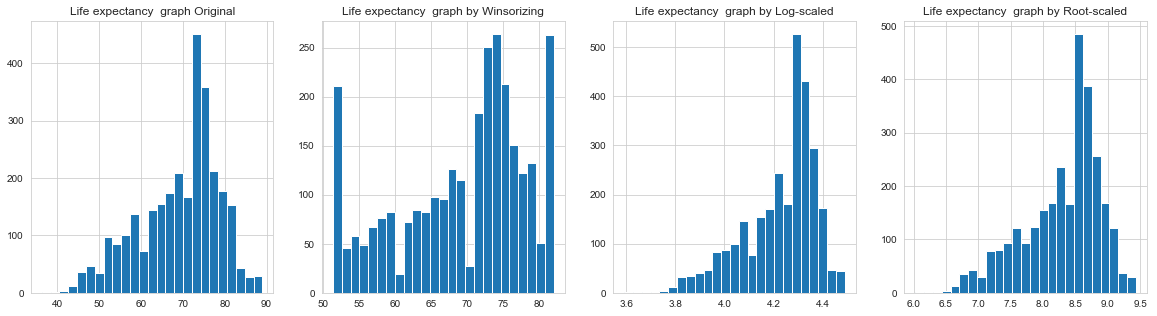

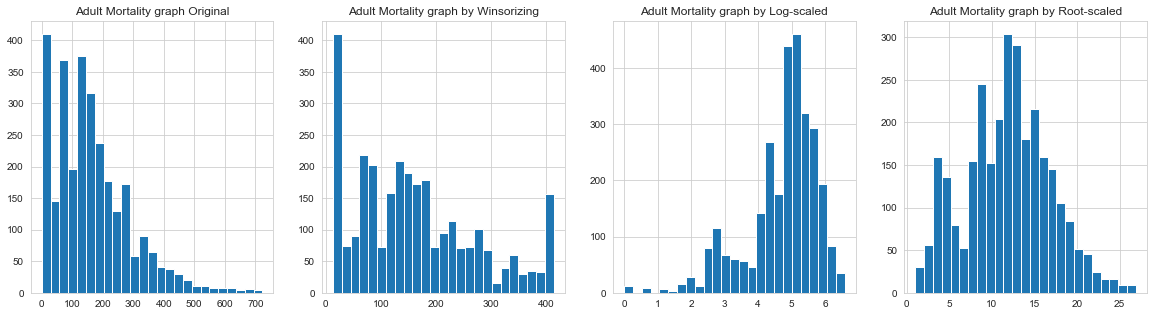

Error


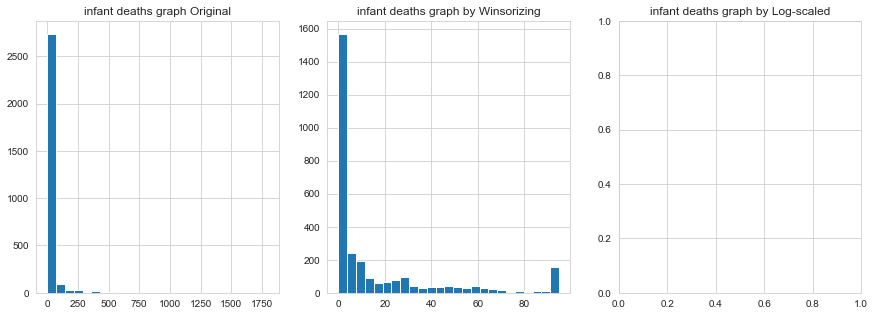

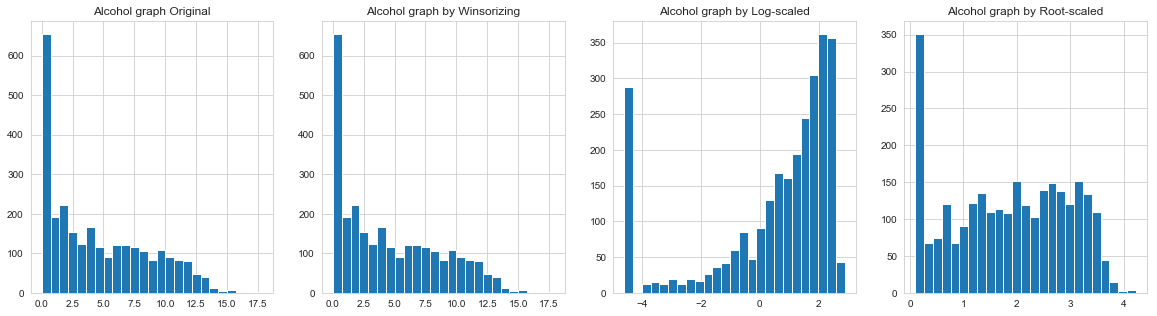

Error


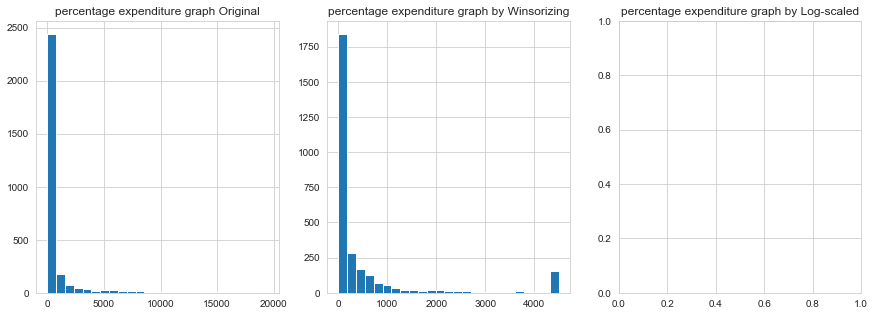

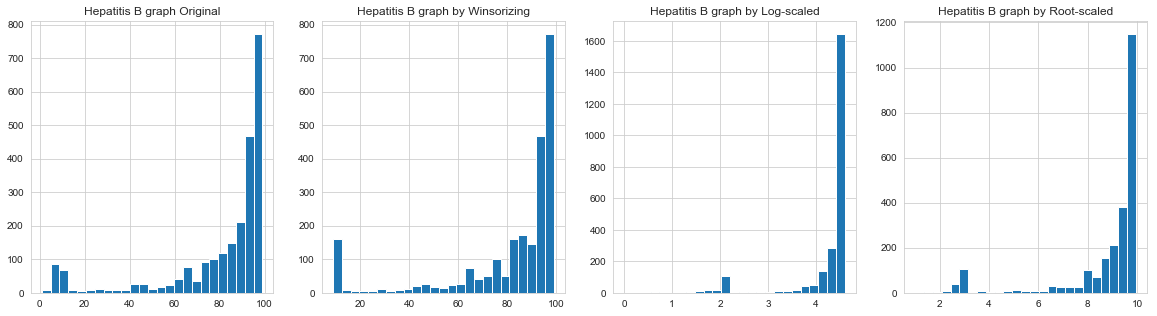

Error


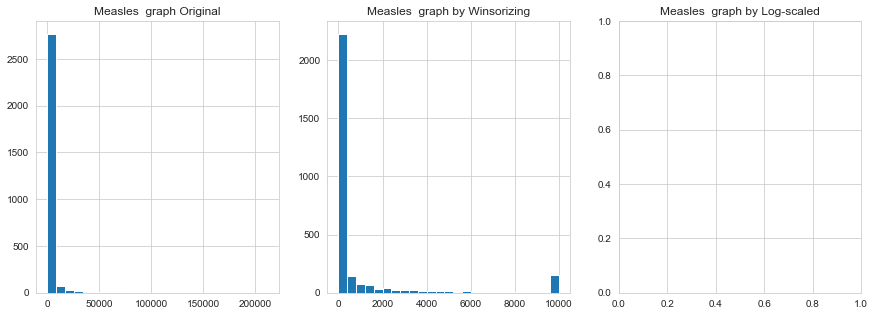

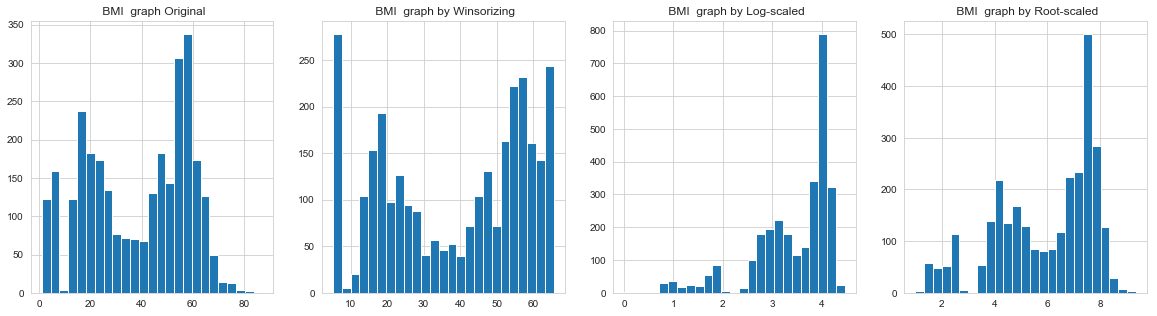

Error


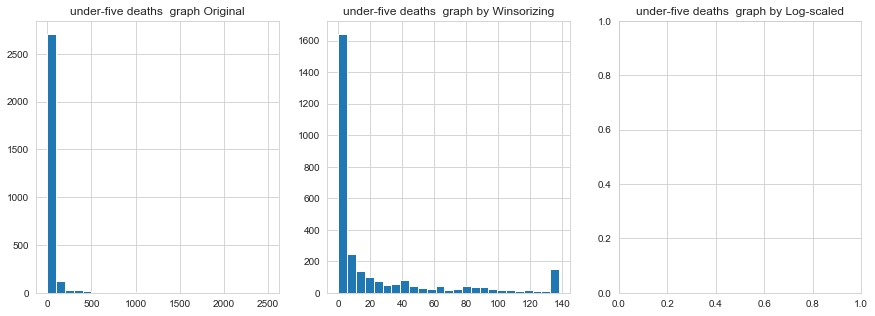

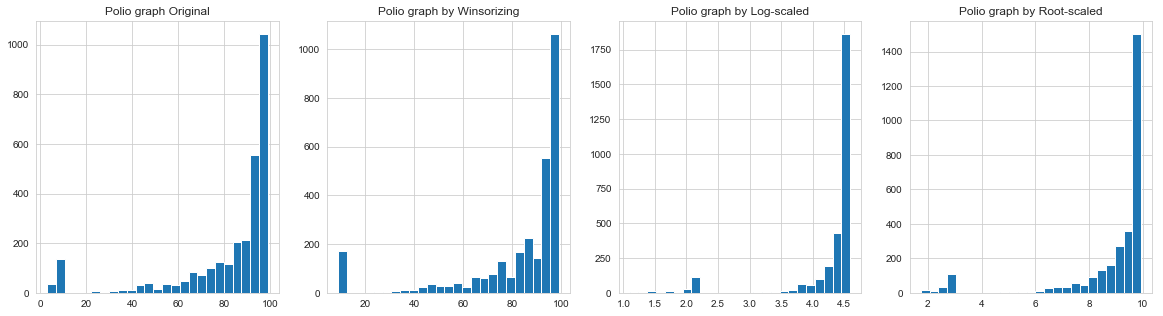

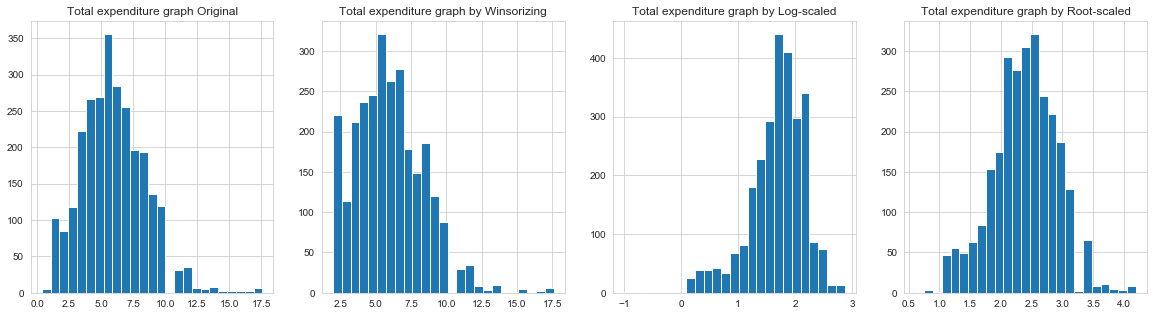

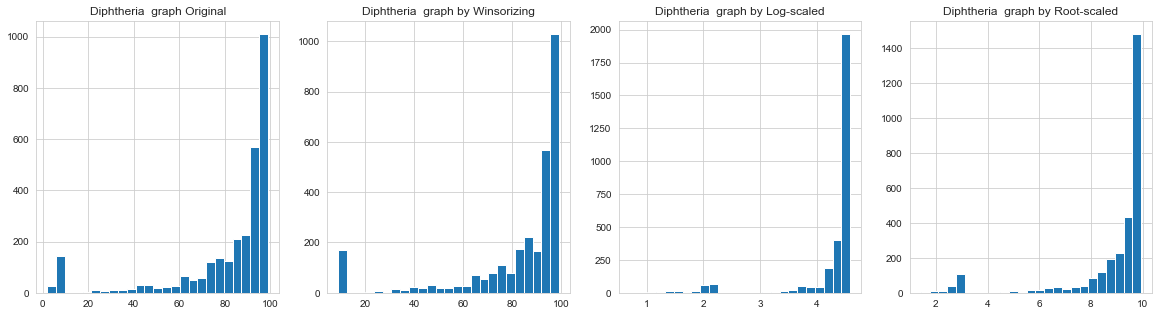

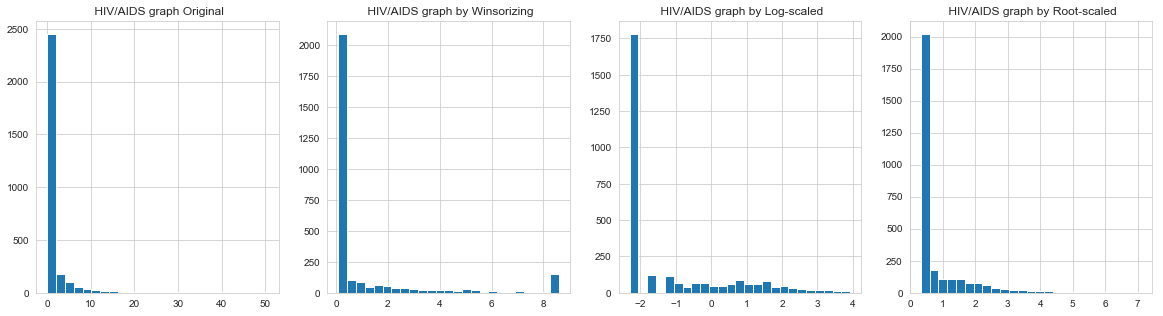

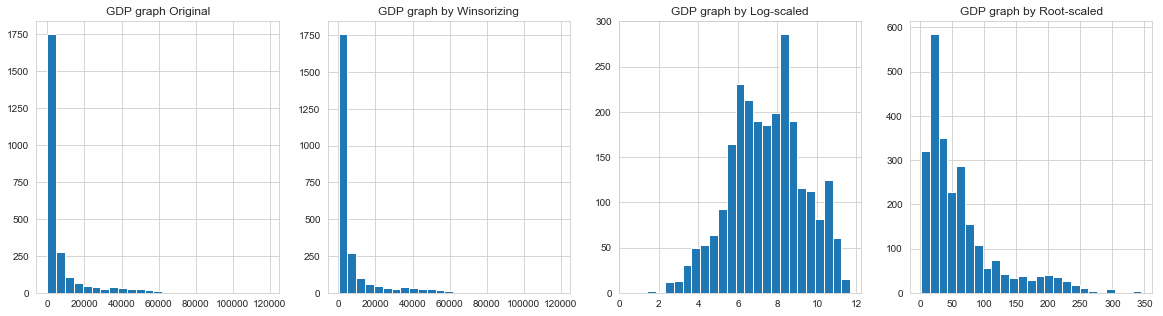

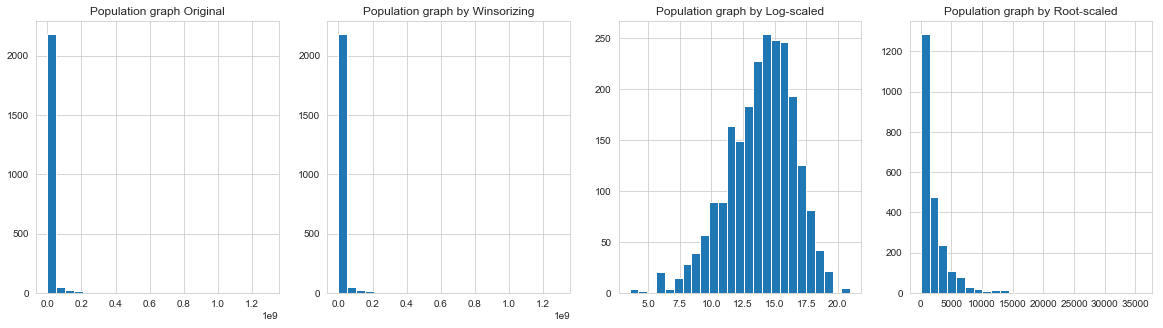

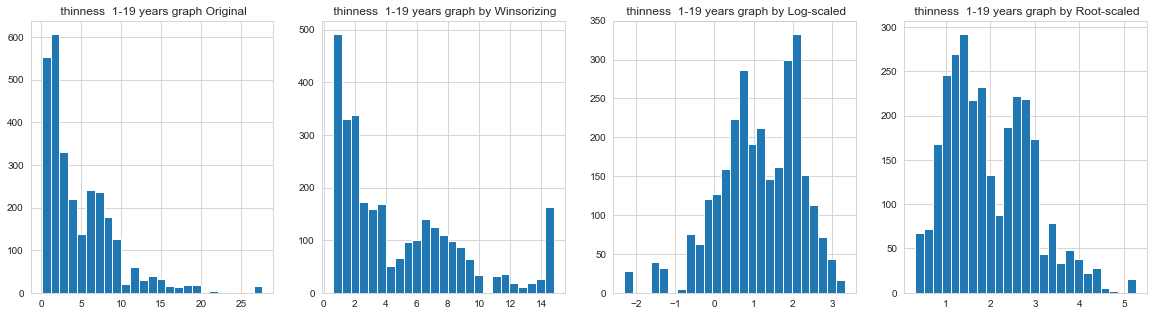

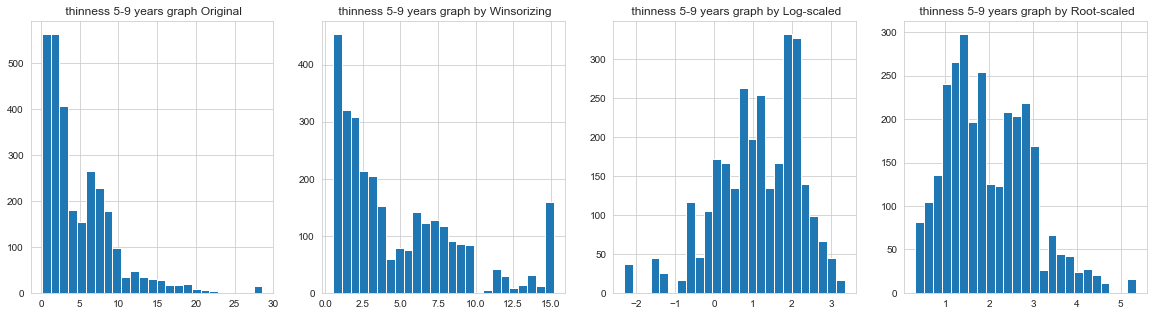

Error
Error


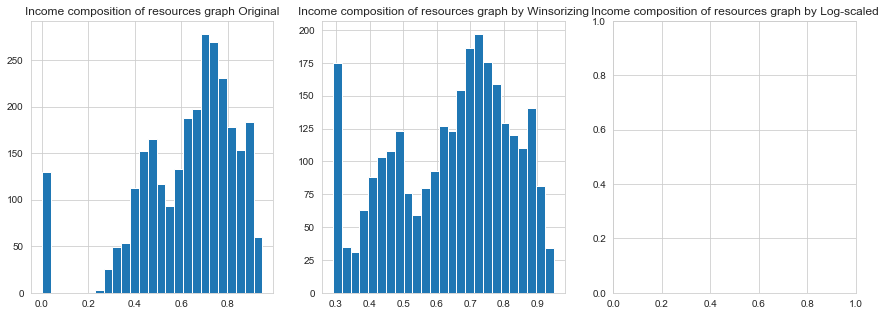

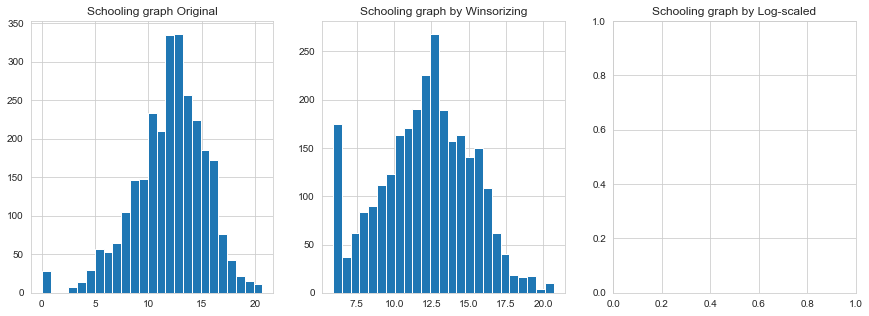

In [8]:
for i in life_df.columns[3:]:
    try: 
        plt.figure(figsize=(20,5))
        
        plt.subplot(1,4,1)
        plt.title('{} graph Original'.format(i))
        plt.hist(life_df[i], bins=25)
        
        plt.subplot(1,4,2)
        plt.title('{} graph by Winsorizing'.format(i))
        plt.hist(winsorize(life_df[i], (0.05, 0.05)), bins=25)
    
        plt.subplot(1,4,3)
        plt.title('{} graph by Log-scaled'.format(i))
        plt.hist(np.log(life_df[i]), bins=25)
    
        plt.subplot(1,4,4)
        plt.title('{} graph by Root-scaled'.format(i))
        plt.hist(np.sqrt(life_df[i]), bins=25)
        plt.show()
    except:
        print('Error')

I draw some graphs in a manner of Winsorizing, Log-scale, Root-scale.  
To sum up, there is a specific type of method which fits to the varible.
 - Original : Life expectancy, BMI, Schooling
 - Log-scale : GDP, Population, Thinness 1~19, Thinness 5~9
 - Root-scale : Adult mortality, Alcohol, Total expenditure
 - Winsorizing : Income Composition.
Others which are not mentioned above, those are not normally distributed even after cleaning. So, I would like to ignore that variables.

### 3. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

단변량은 describe 해서 보고, 히스토그램으로 떼우고
다변량은 산포도 그리면 될듯. 그리고 마지막에 밑에 correlation value 그래프 넣어서 관련있는거 찾아내면 될듯  
Let's find out univariate at first each by each and refer to the above graphs.

In [16]:
life_df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Malaysia,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


Now, before we get into the multivariate check, it will be better to confine variables.   
So, I am going to check correlation values of the dataset. And then, I will pick up a few quite related variables to draw scatter plots.  

Okay, let's find out correlation value of the variable.

In [19]:
life_corr = life_df.corr()
life_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


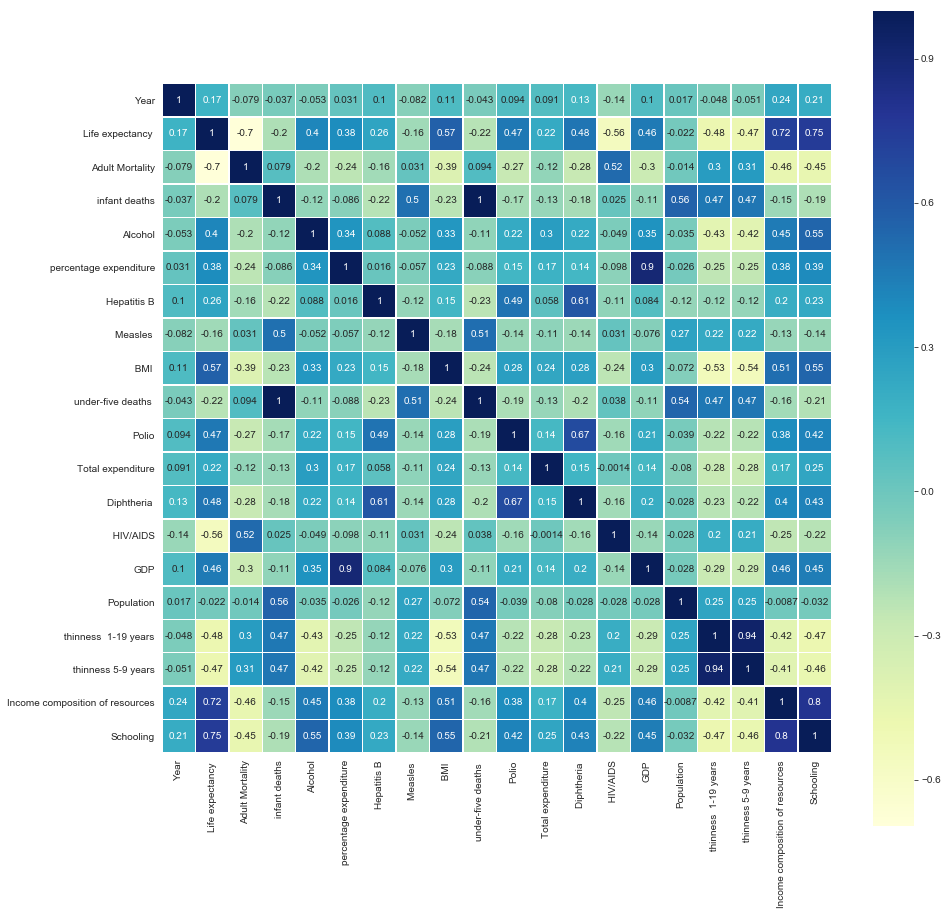

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(life_corr, square=True, annot=True, linewidths=0.5, cmap='YlGnBu')
plt.show()

Let's sort some variables which are positively or negatively related with life expectancy with the score above 0.5 or below -0.5

1. Positively Related (above 0.5) : Schooling, Income composition of resources, BMI
2. Negatively Related (below -0.5) : HIV/AIDS, Adult Mortality

Okay, let's make some scatter graph to look around how they are related with Life Expectancy.


In [31]:
life_scatter = life_df[['Life expectancy ', 'Schooling', 'Income composition of resources',' BMI ', ' HIV/AIDS', 'Adult Mortality']]
life_scatter.head()

,Life expectancy,Schooling,Income composition of resources,BMI,HIV/AIDS,Adult Mortality
0,65.0,10.1,0.479,19.1,0.1,263.0
1,59.9,10.0,0.476,18.6,0.1,271.0
2,59.9,9.9,0.470,18.1,0.1,268.0
3,59.5,9.8,0.463,17.6,0.1,272.0
4,59.2,9.5,0.454,17.2,0.1,275.0


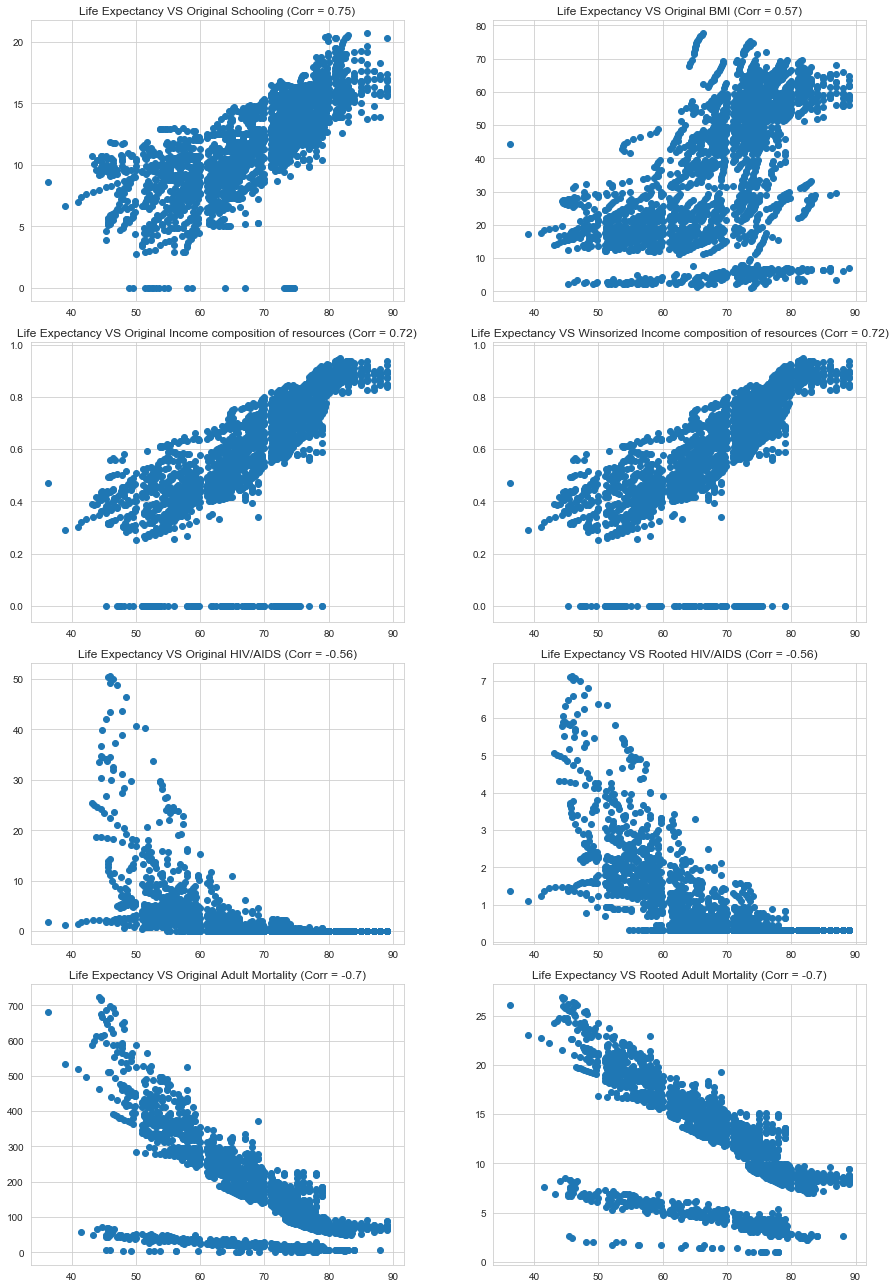

In [77]:
plt.figure(figsize=(13,18))

plt.subplot(4,2,1)
plt.scatter(life_scatter['Life expectancy '], life_scatter['Schooling'])
plt.title('Life Expectancy VS Original Schooling (Corr = 0.75)')

plt.subplot(4,2,2)
plt.scatter(life_scatter['Life expectancy '], life_scatter[' BMI '])
plt.title('Life Expectancy VS Original BMI (Corr = 0.57)')

plt.subplot(4,2,3)
plt.scatter(life_scatter['Life expectancy '], life_scatter['Income composition of resources'])
plt.title('Life Expectancy VS Original Income composition of resources (Corr = 0.72)')

plt.subplot(4,2,4)
plt.scatter(life_scatter['Life expectancy '], winsorize(life_scatter['Income composition of resources']))
plt.title('Life Expectancy VS Winsorized Income composition of resources (Corr = 0.72)')

plt.subplot(4,2,5)
plt.scatter(life_scatter['Life expectancy '], life_scatter[' HIV/AIDS'])
plt.title('Life Expectancy VS Original HIV/AIDS (Corr = -0.56)')

plt.subplot(4,2,6)
plt.scatter(life_scatter['Life expectancy '], np.sqrt(life_scatter[' HIV/AIDS']))
plt.title('Life Expectancy VS Rooted HIV/AIDS (Corr = -0.56)')

plt.subplot(4,2,7)
plt.scatter(life_scatter['Life expectancy '], life_scatter['Adult Mortality'])
plt.title('Life Expectancy VS Original Adult Mortality (Corr = -0.7)')

plt.subplot(4,2,8)
plt.scatter(life_scatter['Life expectancy '], np.sqrt(life_scatter['Adult Mortality']))
plt.title('Life Expectancy VS Rooted Adult Mortality (Corr = -0.7)')

plt.tight_layout()
plt.show()

Some of the above graphs are winsorized or rooted. Because we already figure out that some variables are more fit to transformed values such as winsorizing, rooted, log-scaled.  

In this reason, I draw some variables in the manner of 'more fitting value'  
**However, there are no big changes to the shape of graphs**

### 4. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.


I already mentioned that there are some variables which have something to do with the life expectancy: Income Composition of resources, Schooling and BMI. Also the negatively related variable would be great to be dealt for modeling: HIV/AIDS, Adult Mortality.  

I would like to choose those five variable for examining the relationship with life expectancy.

However, let's check the Principal Components of the dataset. Whether to know that making a new variable is better than using existing variables.

In [79]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [80]:
life_matrix = life_df.drop(['Country', 'Year', 'Status'], axis=1)
life_matrix.dropna(inplace=True)
life_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 19 columns):
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null float64
GDP                                1649 non-null float64
Population                         1649 non-null float64
 thinness  1-19 years              1649 non-

In [81]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(life_matrix)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix : \n', Cx)

Covariance Matrix : 
 [[ 1.0006068  -0.70294935 -0.1691764   0.40296269  0.40987939  0.2000566
  -0.06892302  0.5423705  -0.19238197  0.327493    0.17482366  0.34153835
  -0.59259566  0.4415896  -0.02231851 -0.45811601 -0.4577859   0.72152014
   0.72807156]
 [-0.70294935  1.0006068   0.042476   -0.1756416  -0.23775407 -0.10528929
  -0.00396909 -0.35175579  0.06040166 -0.19997427 -0.08527825 -0.19154492
   0.5510249  -0.25518949 -0.01502095  0.27239523  0.28689686 -0.44247161
  -0.42142609]
 [-0.1691764   0.042476    1.0006068  -0.10628137 -0.09081971 -0.23190957
   0.53300306 -0.2345674   0.99751054 -0.15702403 -0.14704029 -0.16196923
   0.00771623 -0.09815154  0.67216593  0.46369645  0.46218821 -0.13483563
  -0.21450198]
 [ 0.40296269 -0.1756416  -0.10628137  1.0006068   0.41730042  0.10995607
  -0.05014064  0.35361064 -0.1011435   0.24046036  0.21501549  0.24309885
  -0.02712909  0.44370186 -0.02889776 -0.40399999 -0.38644254  0.56141479
   0.61734919]
 [ 0.40987939 -0.23775407 -0.09

In [82]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
eig_val_cov

array([6.13568319e+00, 2.89742064e+00, 1.84530606e+00, 1.59193266e+00,
       1.21930749e+00, 8.83500193e-01, 8.00047754e-01, 6.65595676e-01,
       2.30698835e-03, 3.88837236e-02, 1.28681446e-01, 7.09003556e-02,
       2.02966492e-01, 5.24735720e-01, 5.13008640e-01, 4.21315199e-01,
       3.90006045e-01, 3.48009560e-01, 3.31921300e-01])

In [83]:
eig_vec_cov.shape


(19, 19)

In [84]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.32462741  0.21698642  0.20129735 -0.24502773 -0.21932267 -0.14016815
  0.1107361  -0.27003689  0.20568204 -0.18025344 -0.12906446 -0.18764488
  0.14128991 -0.23364344  0.11110947  0.2974891   0.29613951 -0.3101398
 -0.32877905]
Eigenvalue 1: 6.135683190145307
----------------------------------------
Eigenvector 2: 
[-0.19542471  0.19825858 -0.47292156 -0.12951223 -0.17637145  0.08142606
 -0.321553   -0.0330027  -0.46441371 -0.03000357  0.02794919 -0.02651725
  0.15900875 -0.18165294 -0.41845497 -0.13080891 -0.12995701 -0.18427169
 -0.14298701]
Eigenvalue 2: 2.897420637904658
----------------------------------------
Eigenvector 3: 
[ 0.04834997 -0.06402623  0.02386898 -0.10927764 -0.28919603  0.51594344
  0.0343021  -0.08100169  0.01131531  0.46881105 -0.04233911  0.50944466
 -0.10651899 -0.27283813  0.05262305  0.16575036  0.16179326  0.0007044
 -0.00604515]
Eigenvalue 3: 1.8453060597218867
----------------------------------------
Eigenvector 4: 
[ 0.23953811 -0.384

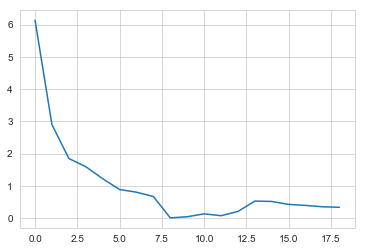

In [85]:
plt.plot(eig_val_cov)
plt.show()

In [86]:
eig_vec_cov[:,0]

array([-0.32462741,  0.21698642,  0.20129735, -0.24502773, -0.21932267,
       -0.14016815,  0.1107361 , -0.27003689,  0.20568204, -0.18025344,
       -0.12906446, -0.18764488,  0.14128991, -0.23364344,  0.11110947,
        0.2974891 ,  0.29613951, -0.3101398 , -0.32877905])

The 8 components represent almost 81.3% of the whole data.

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.32273486 0.15240335 0.09706247 0.08373512 0.06413516 0.04647181
 0.04208224 0.03501011]


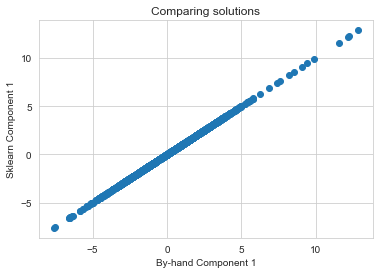

In [87]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=8)
Y_sklearn = sklearn_pca.fit_transform(X)
P = eig_vec_cov[:,0]

#Change the arrangement of P matrix from row-based to column-based.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

**In this case, it is no good to use PCA method as following reason.**

1. The life expectancy could be explained with existing variables with correlation value check up.
2. For the PCA method, you have to remove null values, then the dataset would be almost a half of raw dataset.

### 5. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

**I think for this dataset, to show the correlation between variables are more effective than any other analysis methods.**  
Let's draw the highly related and not highly related variables with the life expectancy by heat map.

Income composition of resources : 0.72
Schooling : 0.75
BMI : 0.57 This variables are quite related. It means that if the value of variable increases, then life expectancy would increase respectively.
Second, let's see the variables negatively related to life expectancy.

HIV/AIDS : -0.56
Adult Mortality : -0.7 This variables are not quite related. It means that if the value of variable increases, then life expectancy would decrease respectively.

In [88]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [89]:
life_high = life_df[['Life expectancy ', 'Income composition of resources', 'Schooling', ' BMI ', ' HIV/AIDS', 'Adult Mortality']]

In [90]:
life_high.head()

,Life expectancy,Income composition of resources,Schooling,BMI,HIV/AIDS,Adult Mortality
0,65.0,0.479,10.1,19.1,0.1,263.0
1,59.9,0.476,10.0,18.6,0.1,271.0
2,59.9,0.470,9.9,18.1,0.1,268.0
3,59.5,0.463,9.8,17.6,0.1,272.0
4,59.2,0.454,9.5,17.2,0.1,275.0


In [91]:
life_high_corr = life_high.corr()

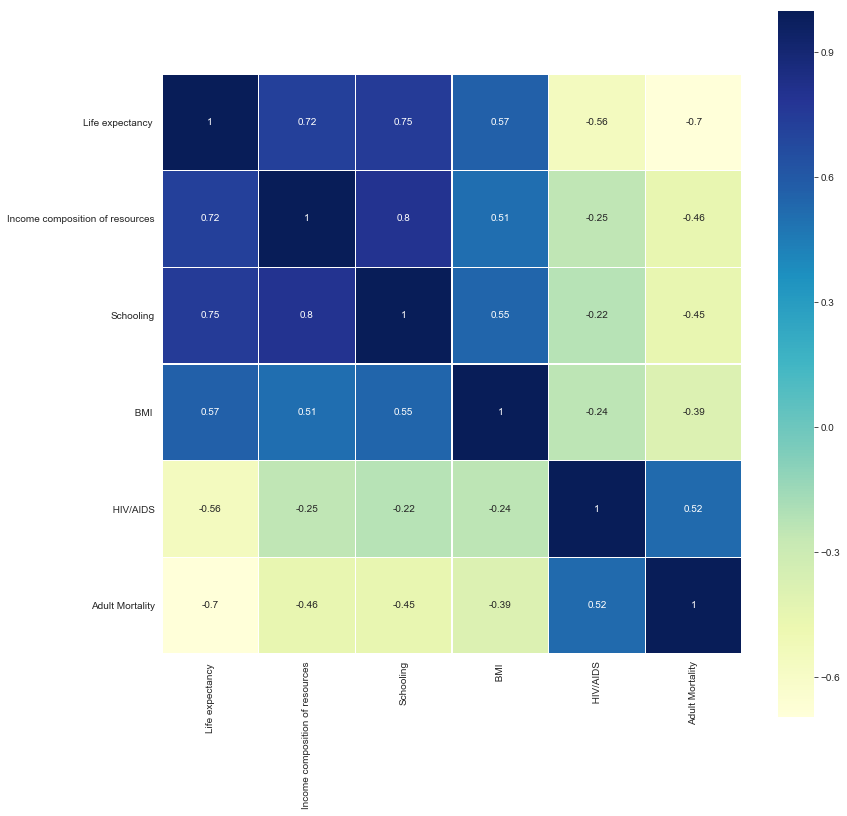

In [92]:
plt.figure(figsize=(13,13))
sns.heatmap(life_high_corr, square=True, annot=True, linewidths=0.5, cmap='YlGnBu')
plt.show()